In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('monthly sales.csv', parse_dates=['Month'])
data.head()

,Month,Sales
0,Jan-13,454904
1,Feb-13,459417
2,Mar-13,617382
3,Apr-13,682274
4,May-13,763242


In [3]:
from datetime import datetime

date = data.Month.apply(lambda x : datetime.strptime(x, '%b-%y').strftime('%Y-%m'))

date

0     2013-01
1     2013-02
2     2013-03
3     2013-04
4     2013-05
5     2013-06
6     2013-07
7     2013-08
8     2013-09
9     2013-10
10    2013-11
11    2013-12
12    2014-01
13    2014-02
14    2014-03
15    2014-04
16    2014-05
17    2014-06
18    2014-07
19    2014-08
20    2014-09
21    2014-10
22    2014-11
23    2014-12
24    2015-01
25    2015-02
26    2015-03
27    2015-04
28    2015-05
29    2015-06
30    2015-07
31    2015-08
32    2015-09
33    2015-10
34    2015-11
35    2015-12
36    2016-01
37    2016-02
38    2016-03
39    2016-04
40    2016-05
41    2016-06
42    2016-07
43    2016-08
44    2016-09
45    2016-10
46    2016-11
47    2016-12
48    2017-01
49    2017-02
50    2017-03
51    2017-04
52    2017-05
53    2017-06
54    2017-07
55    2017-08
56    2017-09
57    2017-10
58    2017-11
59    2017-12
Name: Month, dtype: object

In [4]:
data.index = date
data.drop(['Month'],inplace = True , axis = 1)

In [5]:
data

,Sales
Month,
2013-01,454904
2013-02,459417
2013-03,617382
2013-04,682274
2013-05,763242
2013-06,795597
2013-07,855922
2013-08,766761
2013-09,689907


In [6]:
data.isnull().sum()

Sales    0
dtype: int64

In [7]:
data.duplicated().sum()

0

# Spliting train and test

In [8]:
size = int(len(data)*0.8)

train = data.iloc[:size]
test = data.iloc[size:]

In [9]:
train,len(train)


(           Sales
 Month           
 2013-01   454904
 2013-02   459417
 2013-03   617382
 2013-04   682274
 2013-05   763242
 2013-06   795597
 2013-07   855922
 2013-08   766761
 2013-09   689907
 2013-10   656587
 2013-11   692643
 2013-12   506607
 2014-01   525987
 2014-02   529117
 2014-03   704301
 2014-04   788914
 2014-05   882877
 2014-06   906842
 2014-07   989010
 2014-08   885596
 2014-09   785124
 2014-10   758883
 2014-11   800783
 2014-12   578048
 2015-01   552513
 2015-02   551317
 2015-03   730951
 2015-04   824467
 2015-05   926902
 2015-06   937184
 2015-07  1037350
 2015-08   920401
 2015-09   823332
 2015-10   797253
 2015-11   827645
 2015-12   607572
 2016-01   602439
 2016-02   614957
 2016-03   790881
 2016-04   901950
 2016-05   988730
 2016-06  1022664
 2016-07  1138718
 2016-08   981494
 2016-09   896831
 2016-10   863637
 2016-11   891448
 2016-12   663411,
 48)

In [10]:
test , len(test)

(           Sales
 Month           
 2017-01   617306
 2017-02   621369
 2017-03   822667
 2017-04   938862
 2017-05  1020686
 2017-06  1064624
 2017-07  1171393
 2017-08  1026403
 2017-09   935263
 2017-10   891160
 2017-11   928837
 2017-12   695170,
 12)

<Axes: xlabel='Month'>

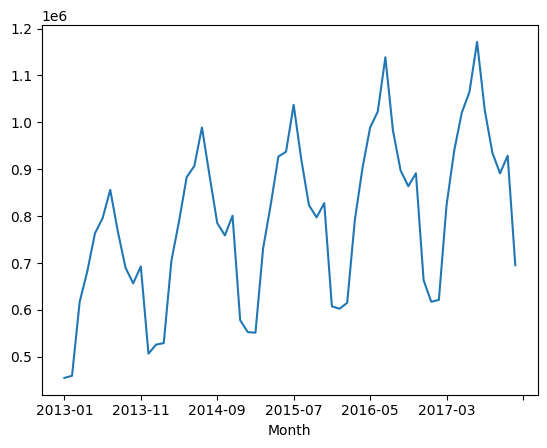

In [17]:
data.Sales.plot()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose =  seasonal_decompose(train.Sales, model = 'additive' , period=12)

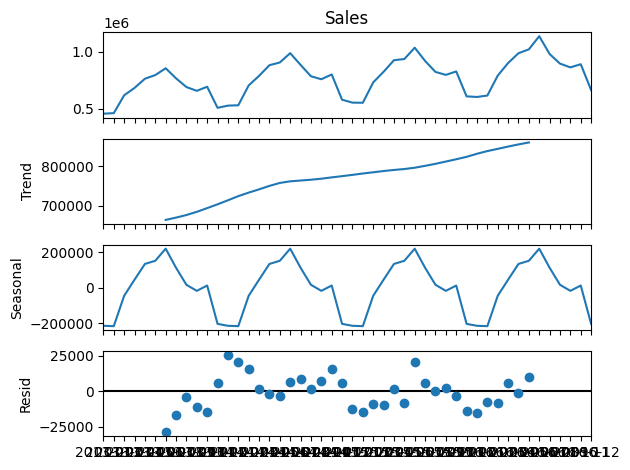

In [16]:
decompose.plot()
plt.show()

In [18]:
# P , d, Q 

from statsmodels.tsa.stattools import adfuller

adf  = adfuller(data.Sales)
adf

(-5.2475188500163545,
 7.026495391574649e-06,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1114.7870935545418)

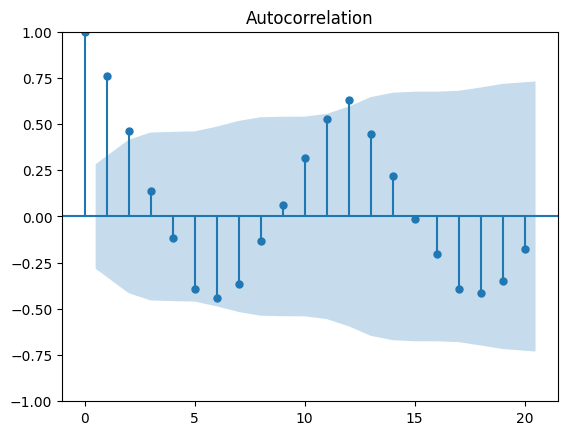

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train.Sales, lags=20)
plt.show()

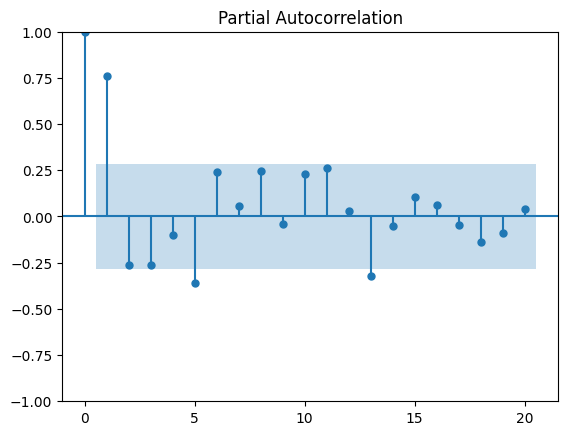

In [20]:

plot_pacf(train.Sales, lags=20)
plt.show()

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima = SARIMAX(train.Sales , order=(1,0,2), seasonal_order=(1,0,2,12))
result = arima.fit()

test['forecast'] = result.forecast(steps = len(test) )



<Axes: xlabel='Month'>

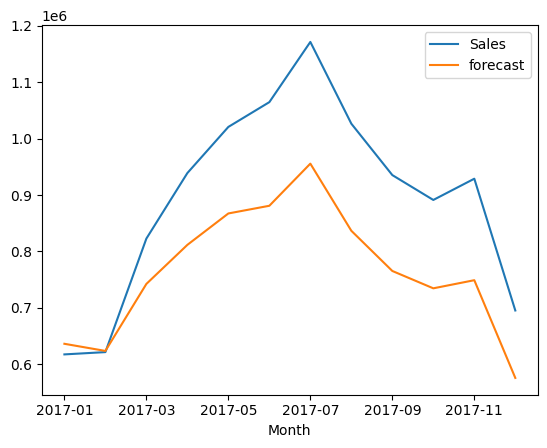

In [28]:
test[['Sales' ,  'forecast']].plot()

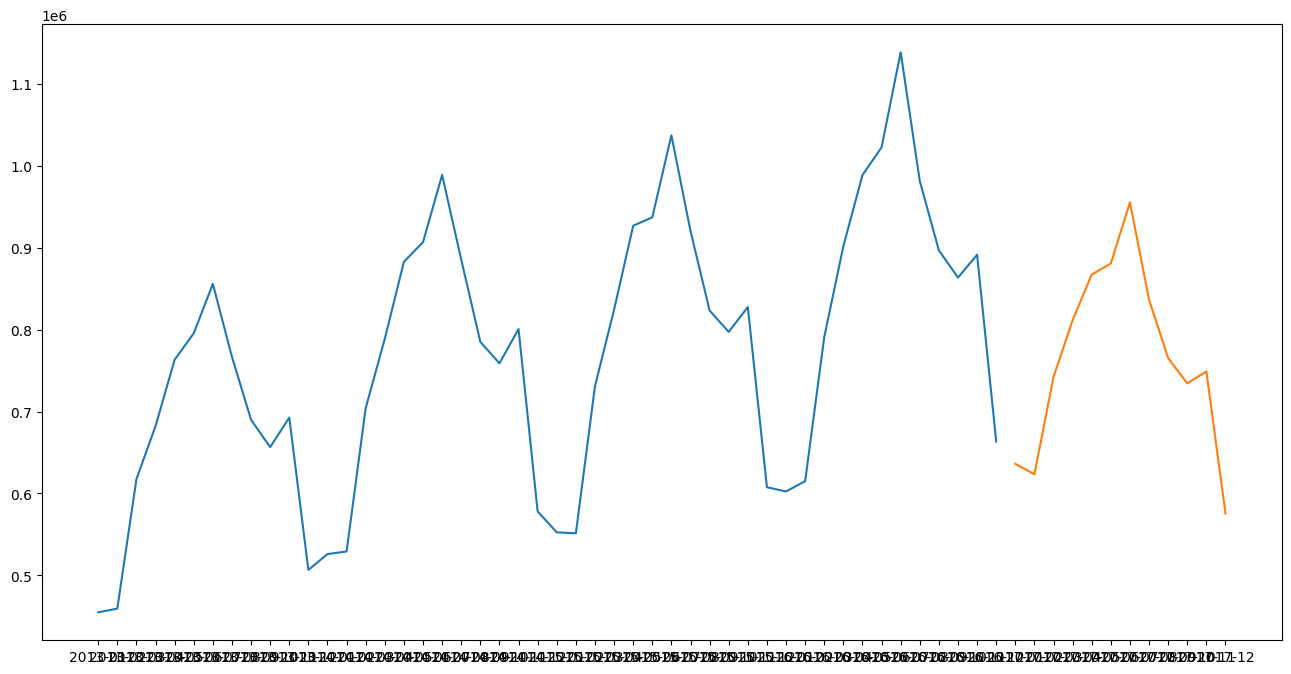

In [30]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'])
plt.plot(test['forecast'])
plt.show()